In [1]:
#imports
import pandas as pd
import math
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
from matplotlib.colors import LinearSegmentedColormap
import ipywidgets as widgets
import warnings

#read data & filter
df = pd.read_csv('Footballdata/Season/EPL.csv', encoding='latin-1', low_memory = False)


#Change Offside Passes to Passes
df = df.replace('OffsidePass', 'Pass')
df['passer'] = df['name'].where(df['type_displayName'] == 'Pass', '')
df['recipient'] = df['name'].shift(-1).where(df['type_displayName'] == 'Pass', '')

#remove substitution events,challenges & formation change
df = df.loc[~(df['type_displayName'] == 'SubstitutionOff')]
df = df.loc[~(df['type_displayName'] == 'SubstitutionOn')]
df = df.loc[~(df['type_displayName'] == 'FormationChange')]
df = df.loc[~(df['type_displayName'] == 'Challenge')]
df = df.loc[~(df['type_displayName'] == 'FormationSet')]
df = df.loc[~(df['type_displayName'] == 'Start')]
df = df.loc[~(df['type_displayName'] == 'End')]

passes = df[df['type_displayName']=='Pass']
successful = passes[passes['outcomeType_displayName']=='Successful']

#Where does the player receive his passes (df1)
df1 = successful[["endX","endY","recipient"]]

#Where does the player make his passes (df2)
df2 = passes[["x","y","passer"]]

#List it in a combo box
options = df["name"].unique()
options = options.tolist()

options = [x for x in options if str(x) != 'nan']
playerlist = widgets.Combobox(
    placeholder='Enter a name',
    options=options,
    description='Player:',
    ensure_option=True,
    disabled=False
)
playerlist

Combobox(value='', description='Player:', ensure_option=True, options=('Eberechi Eze', 'Joachim Andersen', 'Ma…

In [2]:
player = playerlist.value

#filter dataframe to only include passes received by that player
recipientdf = df1[df1['recipient'] == player]

#filter for passes received in the attacking half
#recipientdf = recipientdf[recipientdf['endX'] >= 50]

#filter dataframe to only include passes received by that player
passerdf = df2[df2['passer'] == player]

#filter for passes made in the attacking half
#passerdf = passerdf[passerdf['x'] >= 50]

#Set Color
customcmap = LinearSegmentedColormap.from_list('custom cmap', ['#000000','#67000d','#db2824','#fd5901','yellow'])

# Vertical Pitch

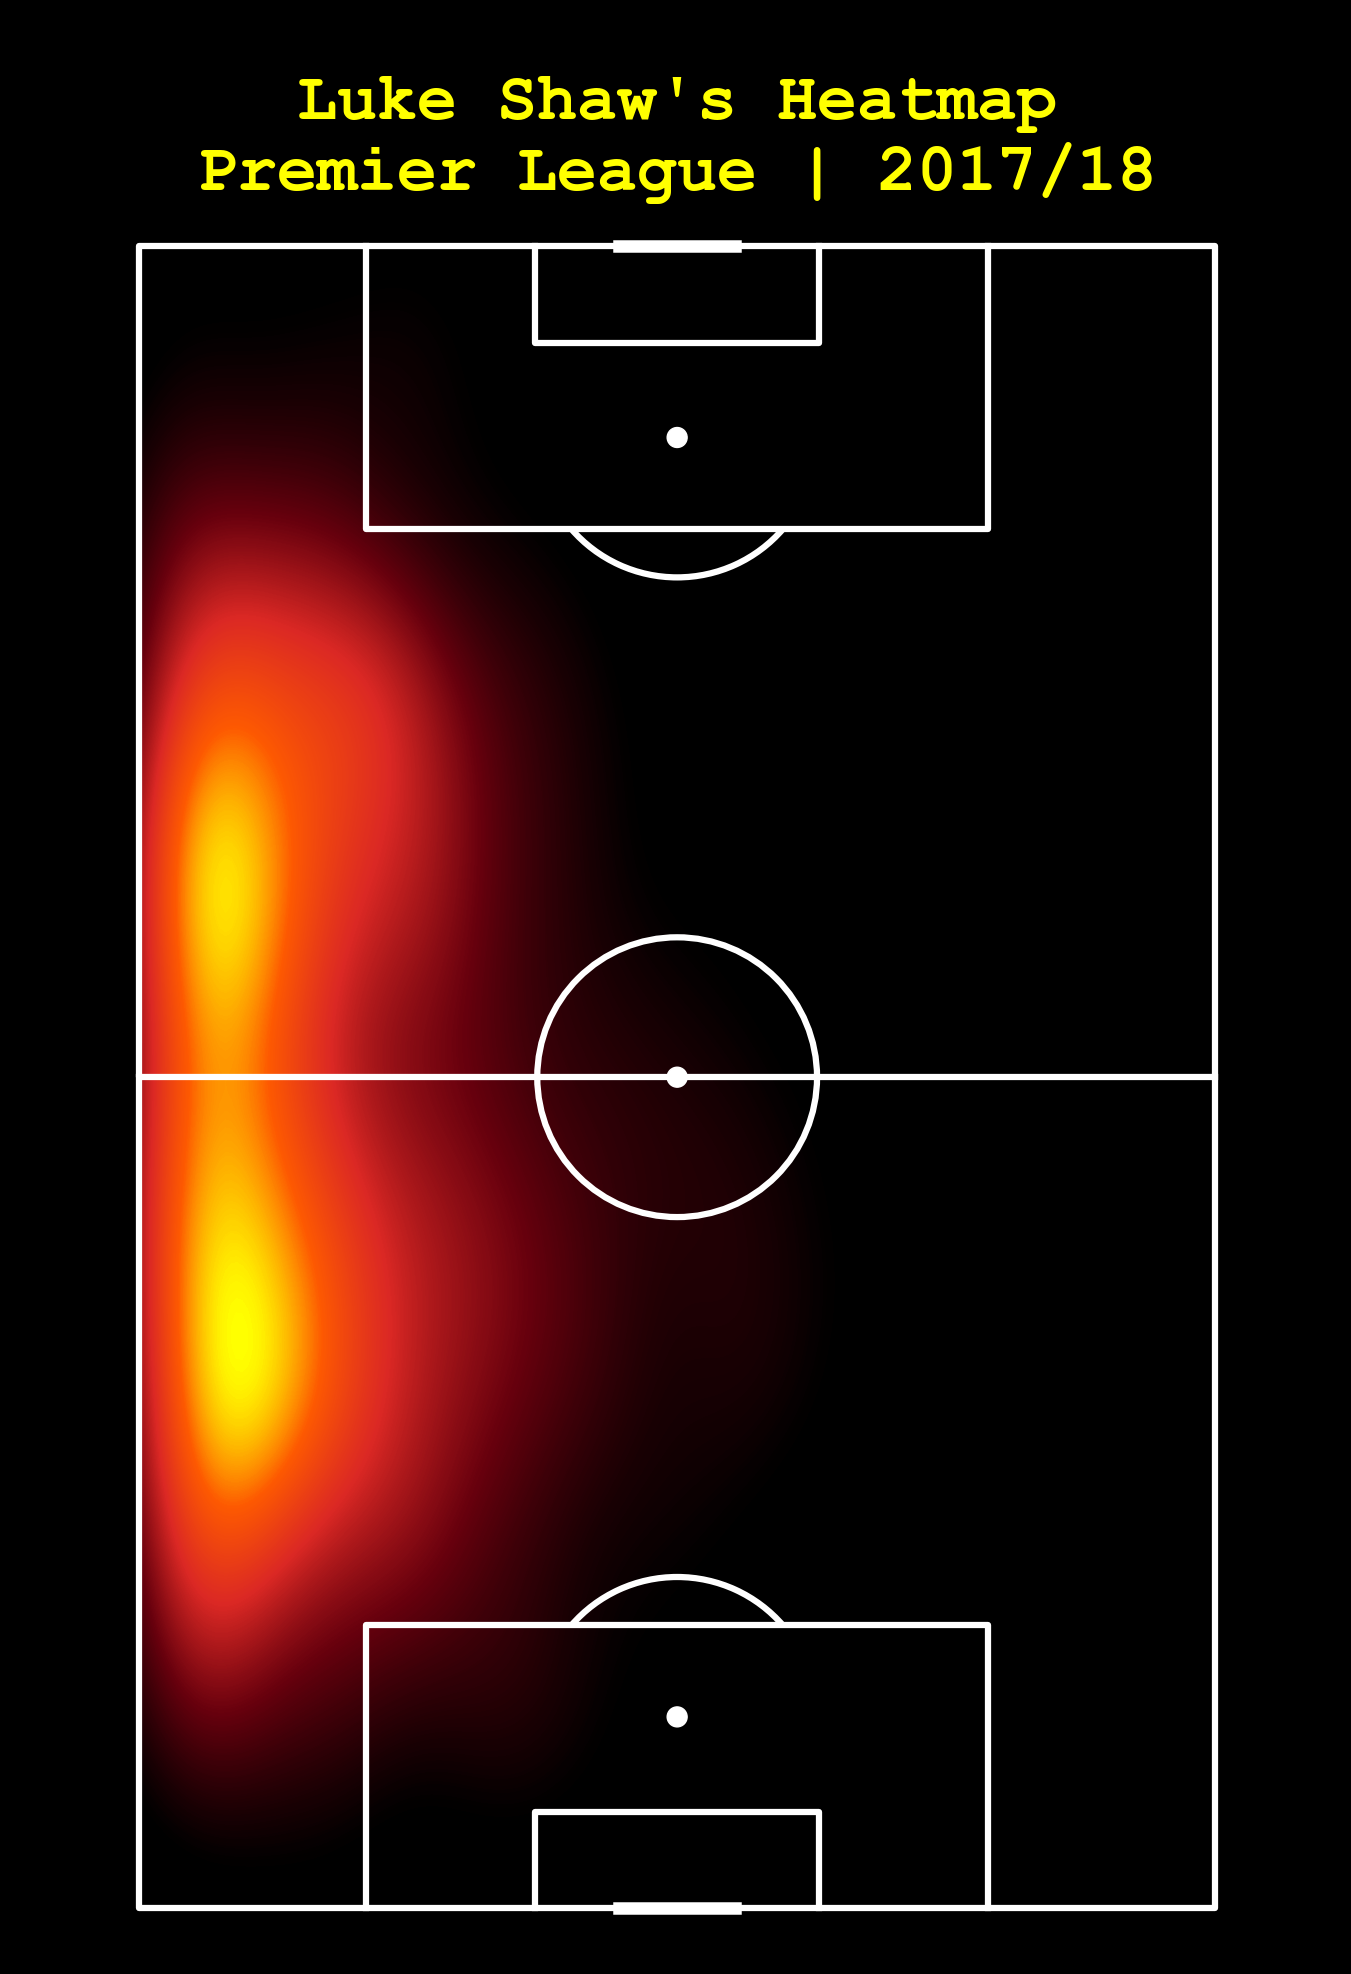

In [4]:
#ignore warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

pitch = VerticalPitch(pitch_type='opta', pitch_color='#000000', line_color='white',half = False,
                  line_zorder=1, linewidth=4.5, spot_scale=0.006)

fig,ax = pitch.draw(figsize=(30, 20), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#000000')

kde = pitch.kdeplot(recipientdf.endX, recipientdf.endY, ax=ax, cmap=customcmap, shade=True, 
                    shade_lowest=False, n_levels=400, linewidths=3, alpha=1, zorder=0.99)

#Title & Annotations
fig.suptitle("\n"+player+"'s Heatmap\nPremier League | 2017/18", fontsize=48, color='yellow',
            fontfamily = "Courier New", fontweight = "bold", y=0.985)

ax.text(112, -2.5, 'space', va='center', ha='left', fontsize=25, color='black',
        fontweight = "bold",fontfamily = "Courier New")

ax.text(-2, -2.5, 'space', va='center', ha='left', fontsize=25, color='black',
        fontweight = "bold",fontfamily = "Courier New")

plt.show()

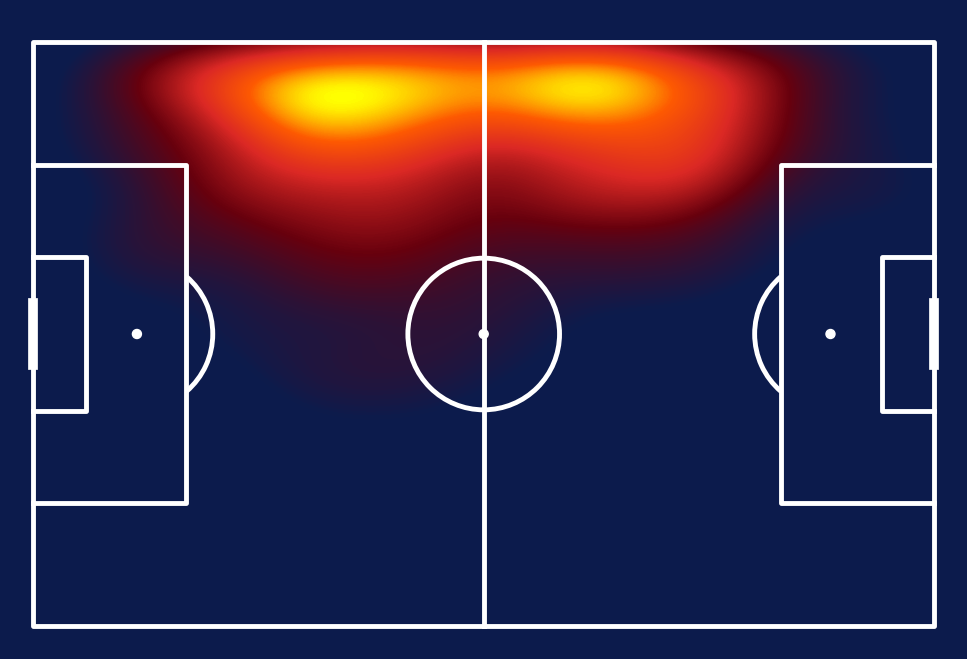

In [27]:
#Set Color
customcmap = LinearSegmentedColormap.from_list('custom cmap', ['#0C1B4C','#67000d','#db2824','#fd5901','yellow'])

#set your mplsoccer pitch characteristics
pitch = Pitch(pitch_type='opta',
                  pitch_color='#0C1B4C', line_color='w',half = False,
                  line_zorder=1, linewidth=3.5, spot_scale=0.005)

fig, ax = pitch.grid(endnote_height=0.0, endnote_space=0, axis=False,
                      title_height=0.001, grid_height=0.7, space=0.0)

fig.set_facecolor('#0C1B4C')

kde = pitch.kdeplot(recipientdf.endX, recipientdf.endY,  ax=ax['pitch'], cmap=customcmap, shade=True, 
                    shade_lowest=False, n_levels=400, linewidths=3, alpha=1, zorder=0.99)